In [1]:
# Multiple Linear Regression Project using Housing Data features to determine what the cost of a home should be
# given new information.

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import os

In [35]:
def OLS(y, y_hat):
    return (y - y_hat).dot(y - y_hat)

def R2(y, y_hat):
    return 1 - ((y - y_hat).dot(y - y_hat)/(y - y.mean()).dot(y - y.mean()))

In [36]:
os.getcwd()

'/home/johnpaul/Housing_MLR_Project'

In [37]:
# loading the datasets

#training dataset
train = pd.read_csv('train.csv')

#validating/testing dataset
test = pd.read_csv('test.csv')

train.shape

(1460, 81)

In [38]:
# Viewing the first 5 columns in the train data set. 
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [39]:
#train.info()



In [40]:
#Cleaning the dataset

#changing objects to categories
train['MSSubClass'] = train['MSSubClass'].astype('object')
columns = pd.DataFrame(train.dtypes[train.dtypes != 'int64'][train.dtypes != 'float64']).index


for column in columns:
    train[column] = train[column].astype('category')
    
train['OverallQual'] = train['OverallQual'].astype('category')
train['OverallCond'] = train['OverallCond'].astype('category')
train['MoSold'] = train['MoSold'].astype('category')
train['GarageYrBlt'] = train['GarageYrBlt'].astype('category')
train['YearBuilt'] = train['YearBuilt'].astype('category')
train['YearRemodAdd'] = train['YearRemodAdd'].astype('category')

#converting columns to numbers


#filling nas with 0
train['LotFrontage'] = train['LotFrontage'].fillna(0)
train['MasVnrArea'] = train['MasVnrArea'].fillna(0)


#train.info()

In [41]:
# Seperating Vales to use

#getting x and y variable
y = train['SalePrice']

x = train.drop('SalePrice', axis = 1)

In [42]:
#y.head(10)

In [43]:
# generating dummy variables

x = pd.get_dummies(x)


In [44]:
x.head(2)


,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,0,0,0,1,0,0,0,0,1,0
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,0,0,0,1,0,0,0,0,1,0


In [45]:
# adding a dummy column to the dataset

x['dum'] = 1
x.head(5)

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,dum
0,1,65.0,8450,196.0,706,0,150,856,856,854,...,0,0,1,0,0,0,0,1,0,1
1,2,80.0,9600,0.0,978,0,284,1262,1262,0,...,0,0,1,0,0,0,0,1,0,1
2,3,68.0,11250,162.0,486,0,434,920,920,866,...,0,0,1,0,0,0,0,1,0,1
3,4,60.0,9550,0.0,216,0,540,756,961,756,...,0,0,1,1,0,0,0,0,0,1
4,5,84.0,14260,350.0,655,0,490,1145,1145,1053,...,0,0,1,0,0,0,0,1,0,1


In [46]:
#split the dataset train, validate and test

x1 = x[:481] # train
x2 = x[481:961] # validate
x3 = x[961:] # test

y1 = y[:481] # train
y2 = y[481:961] # validate
y3 = y[961:] #test



In [47]:
y1.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

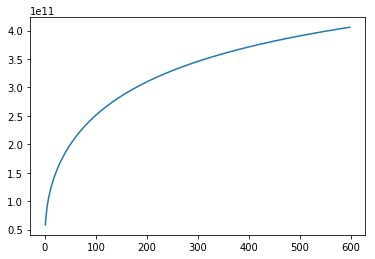

In [48]:
# Calculating w and y_hat on training set x1

ID = np.eye(len(x1.columns))

l1 = np.arange(1,599)
m1 = []
N = len(x1.index)


for i in l1:
    w = np.linalg.solve(x1.T.dot(x1) + i*ID, x1.T.dot(y1))
    y_hat=x1.dot(w)
    J1=((y1-y_hat).T.dot(y1-y_hat))
    m1.append(J1)


    
plt.plot(l1,m1)

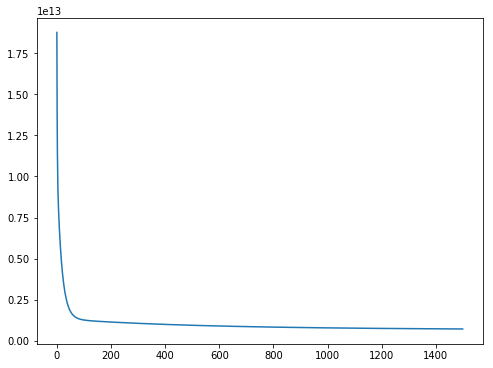

In [49]:
# Gradient Descent

wgd = np.random.randn(599)
J = [ ]
eta = 1e-11
epochs = 1500

for t in range(epochs):
    y_hat = x1.dot(wgd)
    J.append(OLS(y1,y_hat))
    wgd -= eta*x1.T.dot(y_hat - y1)
    
plt.figure(figsize = (8,6))

plt.plot(J)


In [50]:
R2(y1,y_hat)

0.7524675819597719

In [19]:
y_hat

0      197248.421157
1      182435.693976
2      204172.930480
3      183341.418366
4      262576.955665
5      164760.664219
6      251598.602812
7      242085.000584
8      186585.923393
9      142372.323940
10     149798.237888
11     274536.506937
12     131934.818877
13     209524.220312
14     175800.093767
15     113855.955017
16     145695.429732
17     109139.536430
18     161407.453698
19     160763.021428
20     266319.356541
21     114467.271107
22     235973.202199
23     154706.150179
24     131100.452221
25     228593.084592
26     121751.281438
27     253620.892949
28     223311.522881
29      62473.445686
           ...      
451    234755.091375
452    197246.599811
453    171549.767991
454    252906.484869
455    184531.370876
456    138821.165447
457    238490.160374
458    155016.872930
459    133497.757975
460    209509.739406
461    129243.334786
462    116458.303551
463    167808.744479
464    133675.302945
465    176192.664766
466    181656.221193
467    174676

[]

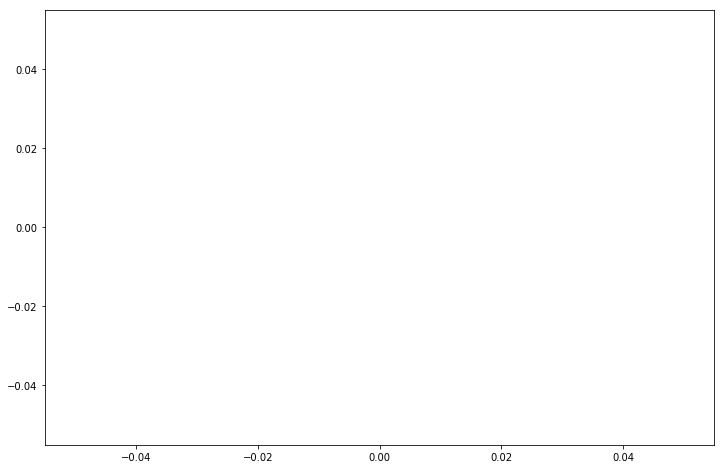

In [20]:
w = wgd

J = []
eta = 1e-3
epochs = int(1e3)

for t in range(epochs):
    y_hat = x1.dot(w)
    J.append(OLS(y1,y_hat))
    w -= eta*x1.T.dot(y_hat - y1)
    
plt.figure(figsize = (12,8))
plt.plot()

In [21]:
# applying my model to new dataset

y_hat_val=x2.dot(wgd)
J2=(y2-y_hat_val).T.dot(y2-y_hat_val)




In [22]:
R2(y2,y_hat_val)

nan

In [23]:
# calculating for 


w_best = np.linalg.solve(x2.T.dot(x2) + 7*ID, x2.T.dot(y2))

w_best


array([ 6.03223522e+00,  6.76236022e-02,  1.01783611e-02,  4.32013803e+01,
        1.42653715e+01,  3.23035877e+00, -3.23723543e+00,  1.42584949e+01,
        1.24592889e+01,  2.32562987e+01, -1.14709988e+01,  2.42445894e+01,
        3.03059174e+03,  8.16126692e+02,  1.09396368e+04,  3.02155301e+03,
       -5.78079982e+03, -1.73213309e+04,  7.20957124e+03,  1.02937704e+04,
        2.38520642e+03,  2.19618987e+01,  4.51717223e+01, -4.35224558e+01,
        6.59965249e+00, -2.70400326e+01,  7.42103649e+01, -1.54756120e+00,
        5.13082468e-01,  4.05834138e+00,  8.91295218e+03, -1.90916668e+03,
        2.10980007e+03,  7.17003433e+02, -4.29693342e+02,  1.87126337e+03,
        3.91162129e+03, -2.96906960e+03,  1.10433904e+03, -3.16777786e+03,
       -4.21890104e+02, -1.66777807e+03, -6.30564412e+03, -6.31790891e+02,
       -1.08983137e+03, -6.32254464e+03,  5.79715763e+03,  1.54235290e+03,
        2.78151048e+03, -3.76413902e+03,  1.48447023e+03, -1.45013288e+03,
       -2.92319012e+03,  

In [24]:
def R2(y, y_hat):
    return 1 - ((y - y_hat).dot(y - y_hat)/(y - y.mean()).dot(y - y.mean()))

R2(y2, y_hat_val)

nan

In [25]:
y_hat_val=x3.dot(w)

In [26]:
len(y_hat_val) + len(y_hat_test)

NameError: name 'y_hat_test' is not defined

In [ ]:
len(y2) + len(y3)

In [ ]:
R2(y3, y_hat_val)

In [ ]:
y_hat_totals = np.hstack((y_hat, y_hat_val, y_hat_test))
y_hat_totals

In [ ]:
y1

In [ ]:
x1.columns

In [ ]:
w[0]
plt.plot(y_hat)

In [ ]:
for l in [100, 200, 300]:

    ID = np.eye(len(x.columns))

    w = np.linalg.solve(x2.T.dot(x2) + l*ID, x2.T.dot(y2))

    y_hat=x2.dot(w)
    
    J=(y2-y_hat).T.dot(y2-y_hat)
# get w
#w = np.linalg.solve(x.T.dot(x), x.T.dot(y))
w




In [ ]:
# graphs
# bar plot showing average sales price for the home in a particular neighborhood

neigh = train.groupby(['Neighborhood'])['SalePrice'].mean()

neigh.plot.bar(figsize =(10,7))


In [ ]:
# stacking y_hat variables

y_hattotals = [y_hat, y_hat_val, y_hat_test]


y_hat_totals = pd.concat(y_hattotals)
y_hat_totals

#train['y_hat_totals'] = y_hat_totals.values
y_hat_totals.shape


In [ ]:
# graph showing neighborhood formulated prices 

neigh = train.groupby(['Neighborhood'])['y_hat_totals'].mean()

neigh.plot.bar(figsize =(10,7))
train


In [ ]:
y_hat_totals



In [ ]:
train['Difference'] = pd.to_datetime(train['SalePrice']) - pd.to_datetime(train['y_hat_totals'])

#neigh = train.groupby(['Neighborhood'])['y_hat_totals'].mean()

#neigh.plot.bar(figsize =(10,7))

In [ ]:
plt.hist(y)

In [ ]:
OLS(y,y_hat)

In [ ]:

style = train.groupby(['HouseStyle'])['SalePrice'].mean()

style.plot.bar(figsize =(10,7))